<a href="https://colab.research.google.com/github/isikgor/hu-bby261-2020/blob/main/Proje_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


0


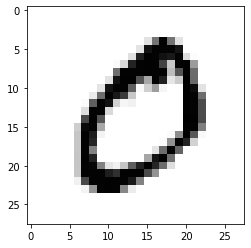

In [2]:
import matplotlib.pyplot as plt
image_index = 1 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 9
plt.imshow(x_train[image_index], cmap='Greys')


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2043 - accuracy: 0.9389
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0849 - accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0577 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0448 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0353 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0299 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0259 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0230 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0198 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 29s 16m

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0610 - accuracy: 0.9856


[0.06096230447292328, 0.9855999946594238]

Mounted at /gdrive
['0 1 2 3 4 5 6 7 8 9']
YAPAY ZEKANIN TAHMİN ETMESİNİ İSTEDİĞİNİZ RAKAM ; 9
9


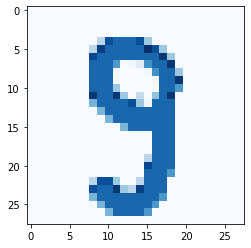

In [20]:
import matplotlib as plt
from google.colab import drive
drive.mount("/gdrive", force_remount=True)
import cv2 
import numpy as nm 
import matplotlib.pyplot as plt



def guess(number):
  
  sayi=cv2.imread("/gdrive/My Drive/Sayılar/{}.png" .format(number) ,0) 
  sayi=cv2.imread("/gdrive/My Drive/Sayılar/{}.png" .format(number)) 
  bin_Sayi=cv2.cvtColor(sayi,cv2.COLOR_BGR2GRAY)
  plt.imshow(bin_Sayi.reshape(28, 28),cmap='Blues')
  tahmini = model.predict(bin_Sayi.reshape(1, 28, 28, 1))

  print(tahmini.argmax())
    
sayilar =["0 1 2 3 4 5 6 7 8 9" ]
print(sayilar)
sayi_al = input("YAPAY ZEKANIN TAHMİN ETMESİNİ İSTEDİĞİNİZ RAKAM ; ")
guess(sayi_al)